In [1]:
pwd

'g:\\Shared drives\\code\\projects\\pcmo\\notebooks'

# imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
import xarray as xr
import sys
from tqdm.notebook import tqdm
from time import time
from glob import glob
from os.path import exists
import h5py
from skbeam.core import correlation as corr

from scipy.ndimage import gaussian_filter
from lmfit import Model, Parameter

In [24]:
temp = 230
g230 = np.load(f'../data/4-4-2024/{temp:.0f}_twotime.npy')

temp = 225
g225 = np.load(f'../data/4-4-2024/{temp:.0f}_twotime.npy')

temp = 220
g220 = np.load(f'../data/4-4-2024/{temp:.0f}_twotime.npy')

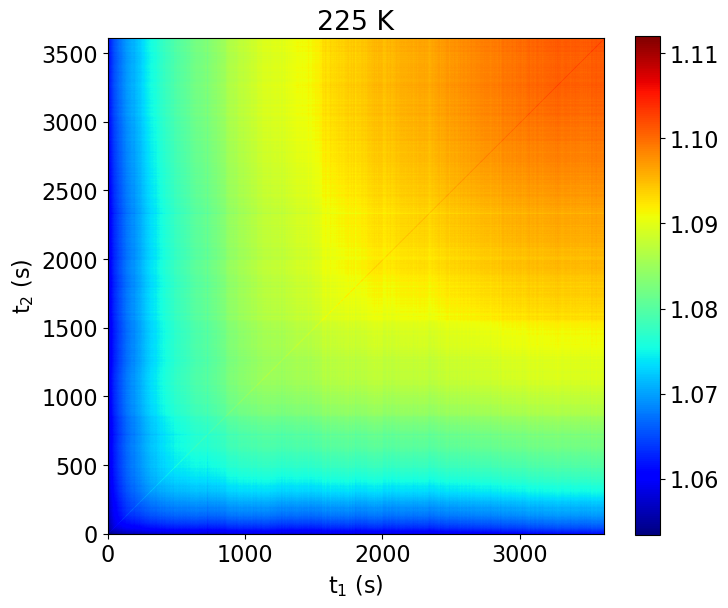

In [20]:
plt.figure(figsize=(8,8))
plt.title(f'225 K')
plt.imshow(g225, origin='lower', cmap='jet',
           extent=[0, len(g230)*1.625, 0, len(g230)*1.625])
plt.colorbar(shrink=0.81)
plt.xlabel(r't$_1$ (s)')
plt.ylabel(r't$_2$ (s)')
plt.show()

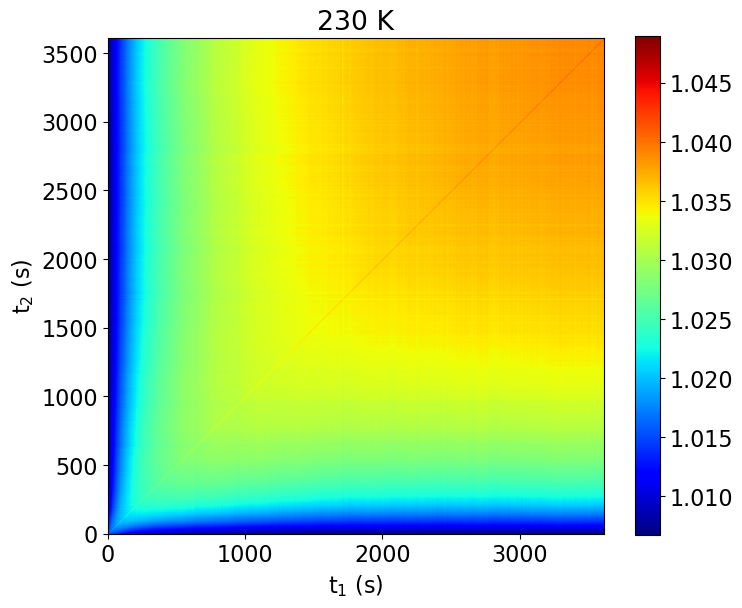

In [21]:
plt.figure(figsize=(8,8))
plt.title(f'230 K')
plt.imshow(g230, origin='lower', cmap='jet',
           extent=[0, len(g230)*1.625, 0, len(g230)*1.625])
plt.colorbar(shrink=0.81)
plt.xlabel(r't$_1$ (s)')
plt.ylabel(r't$_2$ (s)')
plt.show()

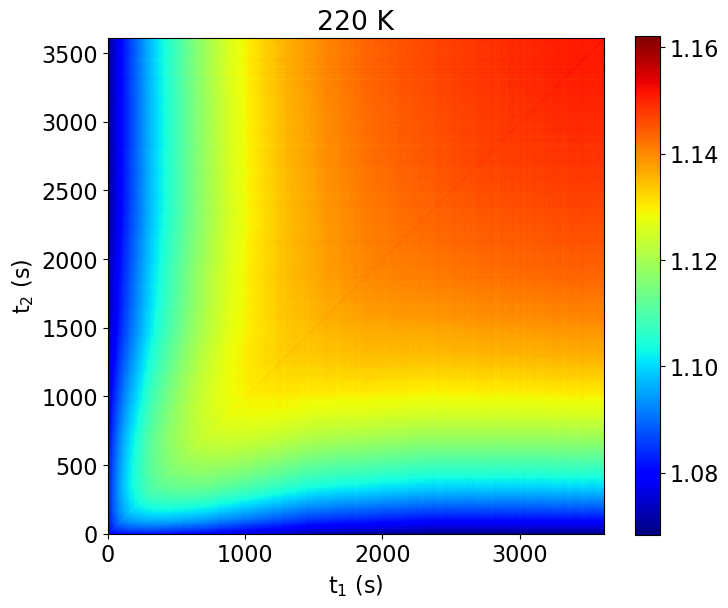

In [25]:
plt.figure(figsize=(8,8))
plt.title(f'220 K')
plt.imshow(g220, origin='lower', cmap='jet',
           extent=[0, len(g230)*1.625, 0, len(g230)*1.625])
plt.colorbar(shrink=0.81)
plt.xlabel(r't$_1$ (s)')
plt.ylabel(r't$_2$ (s)')
plt.show()

In [75]:
g = g220.copy()

cuts = []
for i in [369, 369*2, 369*3, 369*4]:
    tmp = []
    for j in range(min(i, len(g)-i)):
        tmp.append(g[i-j, i+j])
        g[i-j, i+j] = np.nan
    cuts.append(tmp)
        

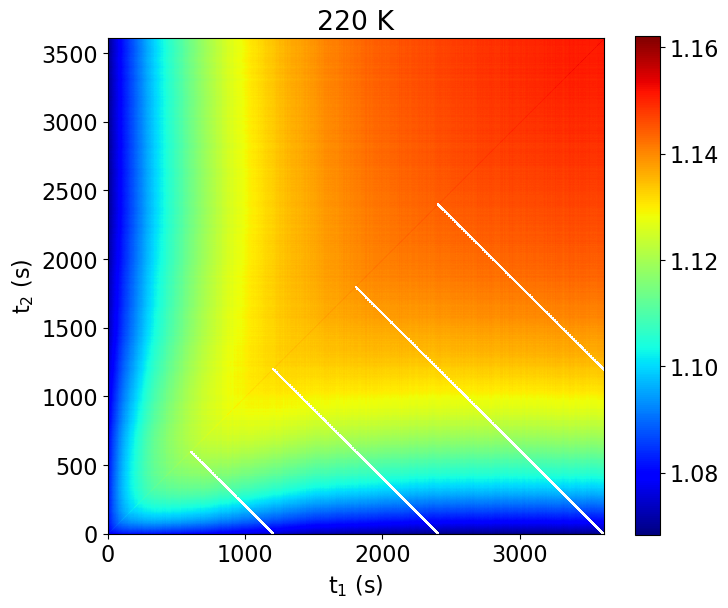

In [76]:
plt.figure(figsize=(8,8))
plt.title(f'220 K')
plt.imshow(g, origin='lower', cmap='jet',
           extent=[0, len(g230)*1.625, 0, len(g230)*1.625])
plt.colorbar(shrink=0.81)
plt.xlabel(r't$_1$ (s)')
plt.ylabel(r't$_2$ (s)')
plt.show()

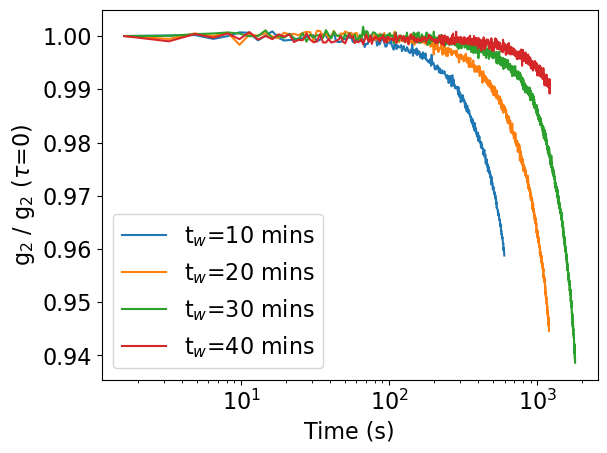

In [77]:
for c, l in zip(cuts, [10, 20, 30, 40]):
    plt.semilogx(np.arange(1, len(c))*1.625, c[1:]/c[1], label=rf't$_w$={l} mins')
    
plt.xlabel('Time (s)')
plt.ylabel(r'g$_2$ / g$_2$ ($\tau$=0)')
plt.legend(fontsize=(16))
plt.show()

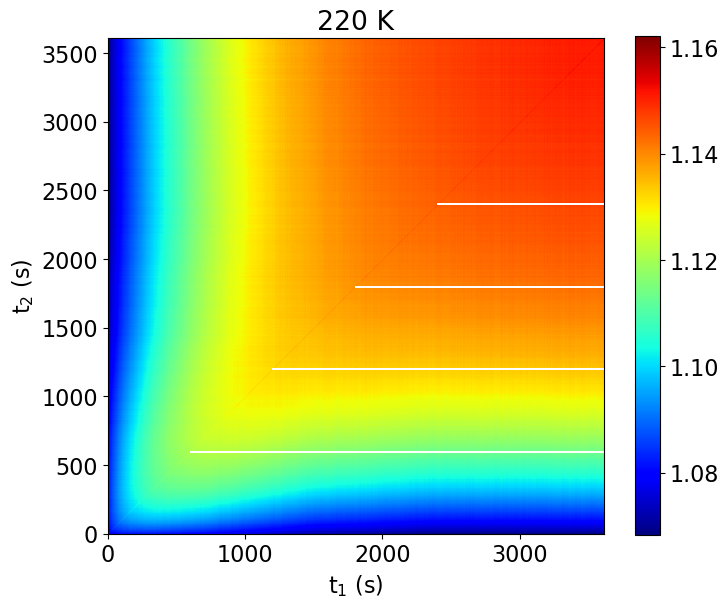

In [139]:
g = g220.copy()

cuts = []
for i in [369, 369*2, 369*3, 369*4]:
    tmp = []
    for j in range(len(g)-i):
        tmp.append(g[i, i+j])
        g[i, i+j] = np.nan
    cuts.append(tmp)

plt.figure(figsize=(8,8))
plt.title(f'220 K')
plt.imshow(g, origin='lower', cmap='jet',
           extent=[0, len(g230)*1.625, 0, len(g230)*1.625])
plt.colorbar(shrink=0.81)
plt.xlabel(r't$_1$ (s)')
plt.ylabel(r't$_2$ (s)')
plt.show()

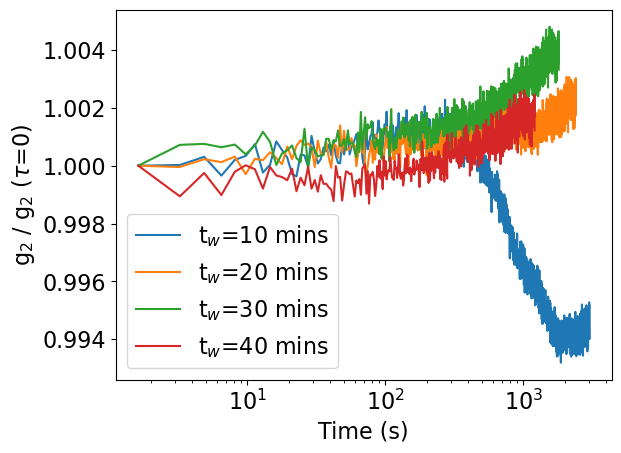

In [140]:
for c, l in zip(cuts, [10, 20, 30, 40]):
    plt.semilogx(np.arange(1, len(c))*1.625, c[1:]/c[1], label=rf't$_w$={l} mins')
    
plt.xlabel('Time (s)')
plt.ylabel(r'g$_2$ / g$_2$ ($\tau$=0)')
plt.legend(fontsize=(16))
plt.show()

# chi

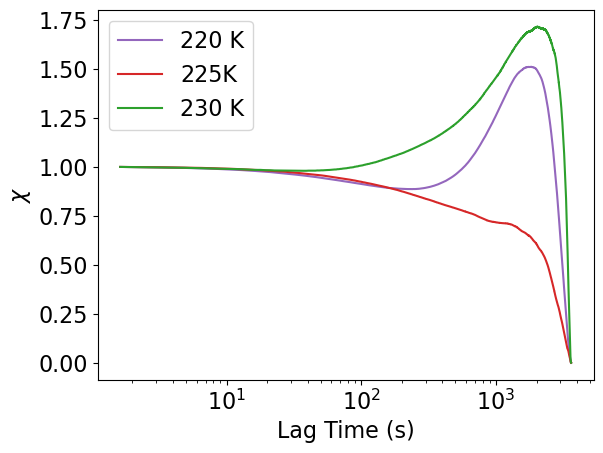

In [136]:
%matplotlib inline

g = g220.copy()
chi220 = np.array([np.var(np.diagonal(g, offset=i)) for i in range(len(g))])
chi220 /= chi220[1]

g = g225.copy()
chi225 = np.array([np.var(np.diagonal(g, offset=i)) for i in range(len(g))])
chi225 /= chi225[1]

g = g230.copy()
chi230 = np.array([np.var(np.diagonal(g, offset=i)) for i in range(len(g))])
chi230 /= chi230[1]

plt.figure()
plt.semilogx(np.arange(1, len(chi220))*1.625, chi220[1:], c='C4', label='220 K')
plt.semilogx(np.arange(1, len(chi225))*1.625, chi225[1:], c='C3', label='225K')
plt.semilogx(np.arange(1, len(chi230))*1.625, chi230[1:], c='C2', label='230 K')
plt.ylabel(r'$\chi$')
plt.xlabel('Lag Time (s)')
plt.legend()
plt.show()